# Example 1: Mixture of normal and exponential distributions

This example is inspired by particle physics:
The dataset consists of the reconstructed masses of possible particle candidates.
Background decays follow an exponential distribution, while signal decays follow a normal distribution.

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tensorprob import Model, Parameter, Normal, Exponential, Mix2, ScipyLBFGSBOptimizer

We model our distribution as

$\mu =$ Mean of normal distribution

$\sigma =$ Standard deviation of normal distribution

$\lambda =$ The rate paramter of the exponential distribution

$f =$ Mixture weight of the normal distribution

$X \sim f\ \mathrm{Normal}(\mu, \sigma) + (1-f)\ \mathrm{Exponential}(\lambda)$

Here, $X$ is the measured reconstructed mass.
This model can be translated into TensorProb as follows:

In [15]:
with Model() as model:
    mu = Parameter(name='mu')
    sigma = Parameter(name='sigma', lower=0)
    lamb = Parameter(name='lamb', lower=0)
    f = Parameter(name='f', lower=0.0, upper=1)

    X = Mix2(f,
        Normal(mu, sigma, lower=0, upper=50),
        Exponential(lamb, lower=0, upper=50),
        lower=0, upper=50,
    )

We declare $X$ as an observed variable and set suitable initial parameter values:

In [16]:
model.observed(X)
model.initialize({
    mu: 25,
    sigma: 2,
    lamb: 0.05,
    f: 0.2
})

The dataset is generated with numpy:

In [17]:
np.random.seed(0)
exp_data = np.random.exponential(40, 10000)
exp_data = exp_data[(0 < exp_data) & (exp_data < 50)]
norm_data = np.random.normal(20, 2, 500)
data = np.concatenate([exp_data, norm_data])

Now we perform a fit of the model using the default optimizer:

In [18]:
result = model.fit(data)
print(result)


OptimizationResult:
   calls: 48
    func: 29295.750875877478
 message: 'convergence: rel_reduction_of_f_<=_factr*epsmch'
   niter: 36
 success: True
       x: array([  0.06332172,   0.02645247,  20.12411514,   1.64026126])


The fit converged successfully and we can visualize the distribution:

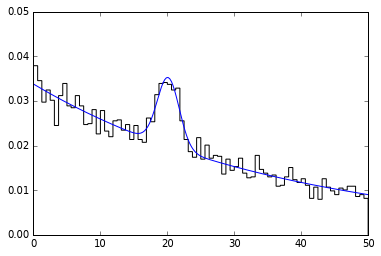

In [19]:
xs = np.linspace(0, 50, 200)
plt.ylim(0, 0.05)
plt.hist(data, bins=80, histtype='step', color='k', normed=True)
plt.plot(xs, model.pdf(xs), 'b-')